![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [70]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.

Finding the frequencies of crimes by the hour of occurrence

In [71]:
# Extracting the hours from the relevant column, converting it to an integer data type.
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes["HOUR OCC"].head()

0    11
1    16
2    12
3     6
4     9
Name: HOUR OCC, dtype: int64

<AxesSubplot: xlabel='HOUR OCC', ylabel='count'>

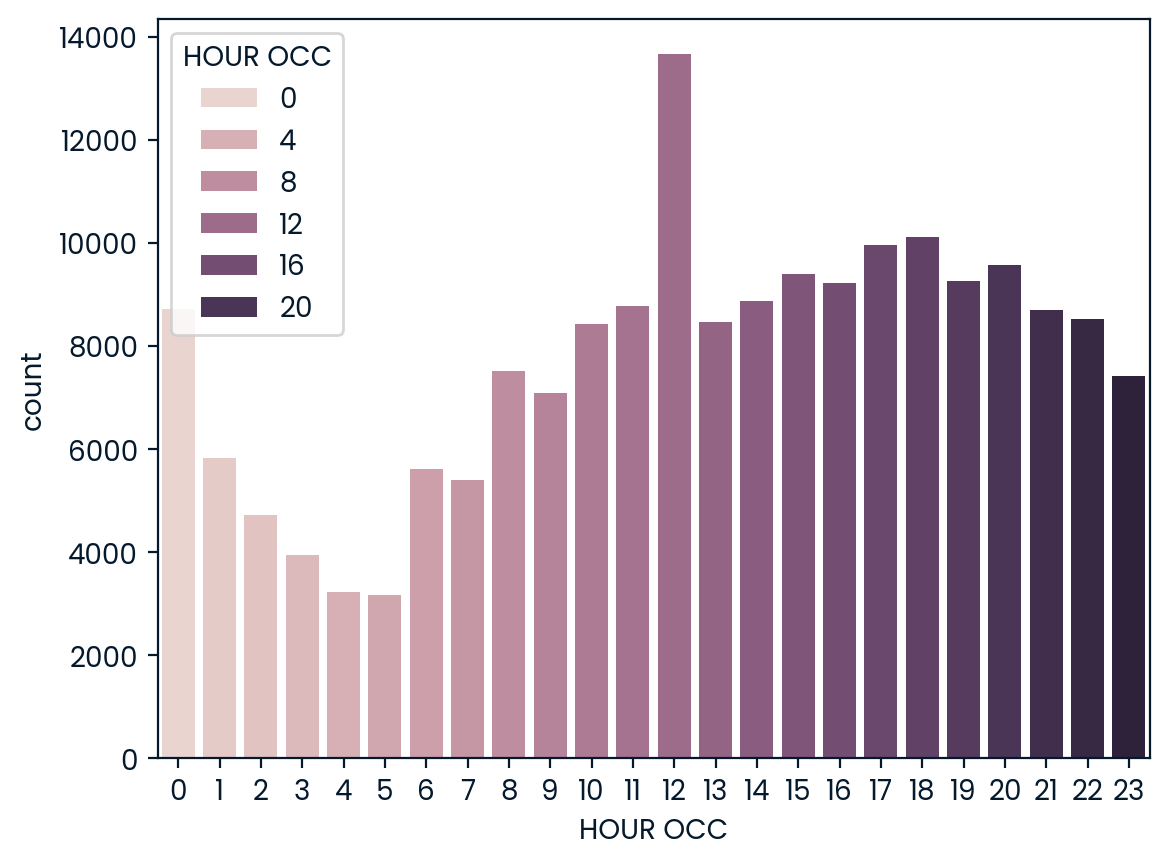

In [72]:
# Plotting the frequencies 
sns.countplot(data = crimes, x = "HOUR OCC", hue = "HOUR OCC")

Based on the previous countplot we can see that the hour with the most frequencies of crimes is 12:00 o'clock

In [73]:
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()
print(peak_crime_hour)

12


## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.

Identifying the area with the most night crime by filtering the data for the relevant hours and counting the number of crimes by area.

In [74]:
# For crimes betwwen 10pm and 3:59 a subset with this night hours is created 
# Filtering for night hours
night_hours = crimes[crimes["HOUR OCC"].isin([22,23,24,0,1,2,3])]

# Group by area and count occurrences
crime_counts_by_area = night_hours.groupby("AREA NAME").size()

# Sort by count in descending order
sorted_counts = crime_counts_by_area.sort_values(ascending=False)

# Get the area with the highest crime count
peak_night_crime_location = sorted_counts.index[0]

print("Peak night crime location:", peak_night_crime_location)

Peak night crime location: Central


## Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`, `"18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

Bining and labeling victim age into the provided groups, then producing a pandas Series detailing how many crimes were committed against each age group.

In [75]:
# Defining the bins for age groups
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')] 
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"] 

# Creating a column to categorize the age of the victims in their age group 
crimes["Age Group"] = pd.cut(crimes["Vict Age"], bins = bins, labels = labels)

# Counting the total number of victims in each age group
# crimes["victim_ages"].value_counts()

victim_ages = crimes.groupby('Age Group').size()

print(victim_ages)

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
dtype: int64


<AxesSubplot: xlabel='Age Group', ylabel='count'>

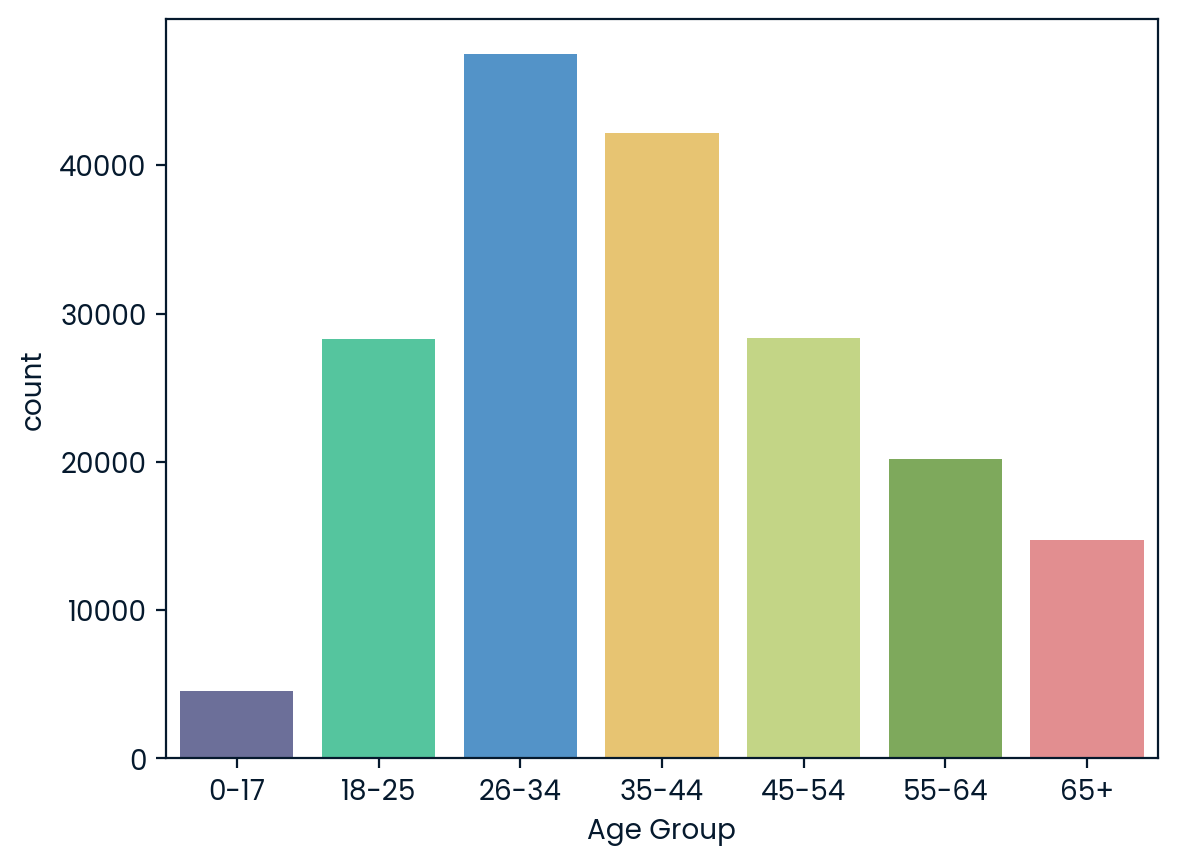

In [76]:
sns.countplot(data = crimes, x = "Age Group", hue = "Age Group")